In [11]:
import pandas as pd
import requests
import json

In [357]:
df = pd.read_csv('911_Police_Calls_for_Service.csv')
df.info()

C:\Users\tsen6\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823490 entries, 0 to 7823489
Data columns (total 20 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   RecordID                     int64  
 1   CallNumber                   object 
 2   CallDateTime                 object 
 3   Priority                     object 
 4   District                     object 
 5   Description                  object 
 6   IncidentLocation             object 
 7   ZipCode                      float64
 8   Neighborhood                 object 
 9   PoliceDistrict               object 
 10  PolicePost                   float64
 11  CouncilDistrict              float64
 12  SheriffDistricts             object 
 13  Community_Statistical_Areas  object 
 14  Census_Tracts                object 
 15  VRIZones                     object 
 16  Location                     object 
 17  2010 Census Neighborhoods    float64
 18  2010 Census Wards Precincts  float64
 19  

In [35]:
df.CallDateTime[:5]
dfNew = df[(df['Priority']=='High') | (df['Priority']=='Emergency')]
dfNew.info()
dfNew.Census_Tracts.unique()               

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959862 entries, 12 to 7823482
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   RecordID                     959862 non-null  int64  
 1   CallNumber                   959862 non-null  object 
 2   CallDateTime                 959862 non-null  object 
 3   Priority                     959862 non-null  object 
 4   District                     959862 non-null  object 
 5   Description                  959862 non-null  object 
 6   IncidentLocation             959860 non-null  object 
 7   ZipCode                      931403 non-null  float64
 8   Neighborhood                 952404 non-null  object 
 9   PoliceDistrict               952492 non-null  object 
 10  PolicePost                   952493 non-null  float64
 11  CouncilDistrict              952573 non-null  float64
 12  SheriffDistricts             952551 non-null  object 
 1

array(['Census Tract 1503', 'Census Tract 1506', 'Census Tract 1803', nan,
       'Census Tract 2003', 'Census Tract 1501', 'Census Tract 1508',
       'Census Tract 401', 'Census Tract 2717', 'Census Tract 2606.05',
       'Census Tract 2505', 'Census Tract 2604.04', 'Census Tract 1504',
       'Census Tract 2201', 'Census Tract 1102', 'Census Tract 2719',
       'Census Tract 1606', 'Census Tract 2008', 'Census Tract 2007.01',
       'Census Tract 2608', 'Census Tract 2708.01', 'Census Tract 1207',
       'Census Tract 1510', 'Census Tract 1505', 'Census Tract 1607',
       'Census Tract 803.01', 'Census Tract 1402', 'Census Tract 1307',
       'Census Tract 2504.02', 'Census Tract 402', 'Census Tract 1206',
       'Census Tract 808', 'Census Tract 2718.01', 'Census Tract 2005',
       'Census Tract 902', 'Census Tract 2101', 'Census Tract 602',
       'Census Tract 1509', 'Census Tract 2506', 'Census Tract 103',
       'Census Tract 2710.01', 'Census Tract 1308.05',
       'Census T

In [359]:
# a = 'this is a 200'
# float(a.split()[3])
def cen_tract(tract_string):
    tract = float(tract_string.split()[2])
    return tract
# dfNew.Census_Tracts[12]

# float(dfNew.Census_Tracts[12].split()[2])
# = df.apply(lambda x: cen_tract(x['Census_Tracts']),axis=1)
# dfNew['Census_Tracts'].unique()

In [60]:
api_token = '827add90f9f79abed8f3344cf60ee0ee09d6c7e6'
#'https://api.census.gov/data/2018/acs/acs5/profile/'

def cen_tract(tract_string):
    tract = tract_string/100
    return str(tract).rstrip('0').rstrip('.')
# dfNew.Census_Tracts[12]

# float(dfNew.Census_Tracts[12].split()[2])

In [618]:
vars = "DP04_0017E,DP04_0018E,DP04_0019E,DP04_0020E,DP04_0021E,DP04_0022E,DP04_0023E,DP04_0024E,DP04_0025E,DP04_0026E"
labels0 = ['2014-2018','2010-2013','2000-2009','1990-1999','1980-1989','1970-1979','1960-1969',
           '1950-1959','1940-1949','1939']
#            'Occupied housing units','Vacant housing units',]
api_url_base = 'https://api.census.gov/data/2018/acs/acs5/profile/'
parameter = {"get":"DP04_0017E,DP04_0018E,DP04_0019E,DP04_0020E,DP04_0021E,DP04_0022E,DP04_0023E,DP04_0024E,DP04_0025E,DP04_0026E",
             "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
request = requests.get(api_url_base,parameter)
#print(request.text)
rhyme_json = request.json()
writeFile =open('file_name0.json', 'w')
#writeFile.write(rhyme_json)
with open('file_name0.json', 'w', encoding='utf-8') as f:
    json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
writeFile.close()

dfYearBuilt = pd.read_json('file_name0.json') #_, orient='split'
dfYearBuilt.iloc[0]
dfYearBuilt.columns = dfYearBuilt.iloc[0]
dfYearBuilt = dfYearBuilt.drop([0])
dfYearBuilt = dfYearBuilt.drop(columns = ['state','county'])
dfYearBuilt
dfYearBuilt.columns = ['2014-2018','2010-2013','2000-2009','1990-1999','1980-1989','1970-1979','1960-1969',
           '1950-1959','1940-1949','1939','tract']
dfYearBuilt = dfYearBuilt.astype('float')

def avg_age(df):
    w = df[:-1]
    y = [2016,2011,2006,1996,1986,1976,1966,1956,1946,1936]
    if w.sum()!=0:
        return round((y * w).sum() / (w.sum()))
    else:
        return sum(y)/len(y)
dfYearBuilt['YearBuilt'] = dfYearBuilt.apply(lambda x: avg_age(x),axis=1)

dfYearBuilt

,2014-2018,2010-2013,2000-2009,1990-1999,1980-1989,1970-1979,1960-1969,1950-1959,1940-1949,1939,tract,YearBuilt
1,87.0,236.0,303.0,92.0,78.0,143.0,472.0,234.0,268.0,2327.0,110200.0,1955.0
2,94.0,175.0,572.0,126.0,137.0,90.0,44.0,34.0,133.0,1144.0,20300.0,1968.0
3,0.0,39.0,27.0,73.0,38.0,28.0,70.0,9.0,138.0,1359.0,150400.0,1945.0
4,0.0,17.0,22.0,8.0,0.0,13.0,9.0,11.0,104.0,1310.0,10200.0,1940.0
5,113.0,37.0,34.0,34.0,132.0,121.0,79.0,41.0,82.0,212.0,60400.0,1972.0
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,66.0,122.0,60.0,64.0,302.0,191.0,92.0,1074.0,120202.0,1952.0
197,0.0,13.0,0.0,195.0,621.0,646.0,238.0,164.0,39.0,0.0,272004.0,1978.0
198,0.0,0.0,13.0,59.0,64.0,213.0,255.0,385.0,93.0,274.0,272005.0,1960.0
199,8.0,81.0,42.0,117.0,81.0,209.0,384.0,396.0,169.0,389.0,272006.0,1963.0


In [620]:
vars = "S0101_C01_001E,S0101_C01_032E"
labels = ['total_population', 'median_age']
api_url_base = 'https://api.census.gov/data/2018/acs/acs5/subject/'
parameter = {"get":"S0101_C01_001E,S0101_C01_032E",
#              DP04_0001E,DP04_0002E,DP04_0003E,DP04_0016E,DP04_0027E,DP04_0037E,DP04_0050E,DP04_0057E,DP04_0080E,DP04_0090E,DP04_0093E",
             "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
request = requests.get(api_url_base,parameter)
#print(request.text)
rhyme_json = request.json()
writeFile =open('file_name.json', 'w')
#writeFile.write(rhyme_json)
with open('file_name.json', 'w', encoding='utf-8') as f:
    json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
writeFile.close()

labels2 = ['%High School Graduate','Median Household Income',
           'Median rooms','no vehicle available',          
           'Total housing units']
#            'Occupied housing units','Vacant housing units',]
api_url_base = 'https://api.census.gov/data/2018/acs/acs5/profile/'
parameter = {"get":"DP02_0066E,DP03_0062E,DP04_0037E,DP04_0058E,DP04_0001E", #,DP04_0002E,DP04_0003E,
             "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
request = requests.get(api_url_base,parameter)
#print(request.text)
rhyme_json = request.json()
writeFile =open('file_name1.json', 'w')
#writeFile.write(rhyme_json)
with open('file_name1.json', 'w', encoding='utf-8') as f:
    json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
writeFile.close()

dfDem = pd.read_json('file_name.json') #_, orient='split'
dfDem.iloc[0]
dfDem.columns = dfDem.iloc[0]
dfDem = dfDem.drop([0])
dfDem = dfDem.drop(columns = ['state','county','tract'])
df2 = pd.read_json('file_name1.json')
df2.iloc[0]
df2.columns = df2.iloc[0]
df2 = df2.drop([0])
dfDem = pd.concat([dfDem, df2], axis=1).reindex(dfDem.index)
dfDem = pd.concat([dfDem,dfYearBuilt['YearBuilt']], axis=1).reindex(dfDem.index)

dfDem.columns =  ['total_population', 'median_age', 
                  'High School Graduate','Median Household Income',#                  
                  'Median rooms','no vehicle available',
                  'Total housing units', #'Occupied housing units','Vacant housing units',
                  'state','county','tract','Year Built']

dfDem.drop(columns=['state','county'])
dfDem['tract'] = dfDem['tract'].astype(str).astype(int)
# dfDem['tract'] = dfDem.apply(lambda x: cen_tract(x['tract']),axis=1)
dfDem.to_csv('Demographics.csv')

dfDem = dfDem.set_index('tract')
dfDem

,total_population,median_age,High School Graduate,Median Household Income,Median rooms,no vehicle available,Total housing units,state,county,Year Built
tract,,,,,,,,,,
110200,5706,32.4,4270,45406,3.1,1694,4240,24,510,1955.0
20300,3877,35.5,3324,108516,4.2,266,2549,24,510,1968.0
150400,3983,32.9,1782,35479,5.5,556,1781,24,510,1945.0
10200,2869,32.0,2275,107617,5.2,109,1494,24,510,1940.0
60400,1376,37.0,1005,55368,4.0,248,885,24,510,1972.0
...,...,...,...,...,...,...,...,...,...,...
120202,5975,21.5,1797,36435,3.2,674,1971,24,510,1952.0
272004,3898,37.5,2579,42800,4.6,292,1916,24,510,1978.0
272005,3395,35.5,2010,59500,5.3,170,1356,24,510,1960.0


In [85]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [88]:
cities = gpd.read_file("zip:///Users/tsen6/Desktop/Python/tl_2019_24_tract.zip")
#                        ") tl_2019_us_zcta510.zip
cities.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

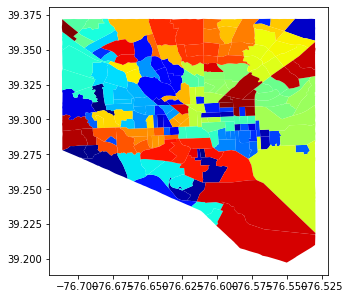

In [107]:
cities['COUNTYFP'] = cities['COUNTYFP'].astype(str).astype(int)
baltimore_counties = [510] #[163] #[87,93,99,125,147,163]
baltimore = gpd.GeoDataFrame()
for county in baltimore_counties:
    #print(county)
    temp = cities[cities['COUNTYFP']==county]
    #print(temp)
    baltimore = baltimore.append(temp)
    
baltimore.plot(cmap = 'jet',figsize=[5,5]) #,column = 'COUNTYFP'
# baltimore.NAME.unique()

baltimore = baltimore.drop(columns=['STATEFP','COUNTYFP','TRACTCE','GEOID','MTFCC','FUNCSTAT',
                        'AWATER'])

In [108]:
baltimore = baltimore.rename(columns={"NAME": "tract"})
baltimore = baltimore.set_index('tract')
len(baltimore)

200

In [109]:
for col in dfDem.columns:
    baltimore[col]=dfDem[col]

In [110]:
def pop_area(pop,area):
    norm_pop = int(float(pop)/(float(area)* 3.86102e-7))
    return norm_pop

baltimore['pop_sq_mile'] = baltimore.apply(lambda x: pop_area(x['total_population'],x['ALAND']),axis=1)

In [111]:
baltimore

,NAMELSAD,ALAND,INTPTLAT,INTPTLON,geometry,total_population,median_age,Total housing units,Occupied housing units,Vacant housing units,Median rooms,no vehicle available,state,county,pop_per_area,pop_sq_mile
tract,,,,,,,,,,,,,,,,
1509,Census Tract 1509,1447256,+39.3142207,-076.6842999,"POLYGON ((-76.69029 39.31007, -76.69025 39.310...",3359,45.1,1649,1265,384,6.2,181,24,510,0.002321,6011
2403,Census Tract 2403,200576,+39.2758588,-076.6105163,"POLYGON ((-76.61262 39.27889, -76.61149 39.278...",2085,31.8,1127,1037,90,4.8,101,24,510,0.010395,26923
2501.01,Census Tract 2501.01,962784,+39.2771141,-076.7003721,"POLYGON ((-76.71098 39.27792, -76.71071 39.278...",4340,35.9,1710,1613,97,5.9,319,24,510,0.004508,11675
2501.02,Census Tract 2501.02,737636,+39.2773395,-076.6901916,"POLYGON ((-76.69576 39.27784, -76.69572 39.277...",3236,33.4,1348,1231,117,5.7,218,24,510,0.004387,11362
2501.03,Census Tract 2501.03,2587958,+39.2687004,-076.6776588,"POLYGON ((-76.69741 39.27239, -76.69599 39.272...",3411,45.4,1784,1554,230,5.2,475,24,510,0.001318,3413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803.02,Census Tract 803.02,439533,+39.3059215,-076.5764340,"POLYGON ((-76.58010 39.30906, -76.57952 39.309...",2715,47.9,1327,1084,243,6.6,421,24,510,0.006177,15998
804,Census Tract 804,250976,+39.3056714,-076.5861659,"POLYGON ((-76.58851 39.30868, -76.58739 39.308...",1280,36.6,799,401,398,5.9,234,24,510,0.005100,13209
805,Census Tract 805,348376,+39.3141597,-076.5938464,"POLYGON ((-76.59906 39.31296, -76.59897 39.313...",1479,39.0,766,527,239,6.2,312,24,510,0.004245,10995


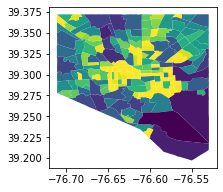

In [150]:
# fig, ax = plt.subplots(figsize=(20, 5))
baltimore.to_file("baltimoe_data.shp")
baltimore2 = gpd.read_file("baltimoe_data.shp")
baltimore2.plot(cmap = 'viridis',figsize=[3,3], column='pop_sq_mil', vmax=15000)
# colorbar()
# baltimore.NAME.unique()

In [360]:
import pandas as pd
df = pd.read_csv('C:/Users/tsen6/Desktop/Python/Analysis911/911_Police_Calls_for_Service.csv')
df['Count']=1
df['CallDateTime']=pd.to_datetime(df['CallDateTime'])

In [361]:
df = df[(df['CallDateTime'].dt.year > 2012) &
            (df['CallDateTime'].dt.year < 2019)]

In [362]:
df = df.dropna(subset=['Census_Tracts'])
df = df.dropna(subset=['PoliceDistrict'])

In [193]:
CDs = df['Census_Tracts'].unique()
dfAgg = pd.DataFrame()
for cd in CDs:
    Temp = df[df['Census_Tracts']==cd]
    dfSum = Temp['Count'].groupby(Temp['CallDateTime'].dt.date).sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index    
    dfTemp['Census_Tracts'] = cd
    dfAgg = dfAgg.append(dfTemp)   
    
dfAgg['Date']= pd.to_datetime(dfAgg['Date'])

1704756    2018
1705019    2018
1705065    2018
1705174    2018
1705198    2018
           ... 
7488569    2014
7488604    2014
7488925    2014
7489099    2014
7489138    2014
Name: CallDateTime, Length: 23962, dtype: int64

In [201]:
dfYear = pd.DataFrame()

for cd in CDs:
    Temp = df[(df['Census_Tracts']==cd)]
    dfSum = Temp['Count'].groupby(Temp['CallDateTime'].dt.year).sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index    
    dfTemp['Census_Tracts'] = cd
    dfYear = dfYear.append(dfTemp) 
dfYear

,Count,Date,Census_Tracts
CallDateTime,,,
2014,5556,2014,Census Tract 1002
2015,4667,2015,Census Tract 1002
2016,4348,2016,Census Tract 1002
2017,4272,2017,Census Tract 1002
2018,3760,2018,Census Tract 1002
...,...,...,...
2014,5579,2014,Census Tract 2506
2015,6064,2015,Census Tract 2506
2016,5279,2016,Census Tract 2506


In [202]:
def cen_tract(tract_string):
    tract = (tract_string.split()[2])
    return tract
# dfNew.Census_Tracts[12]

# float(dfNew.Census_Tracts[12].split()[2])
dfYear['Census_Tracts'] = dfYear.apply(lambda x: cen_tract(x['Census_Tracts']),axis=1)

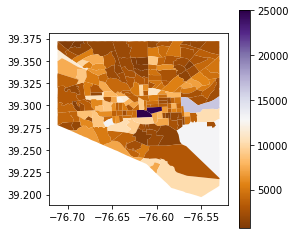

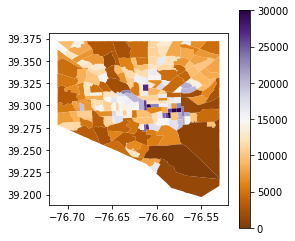

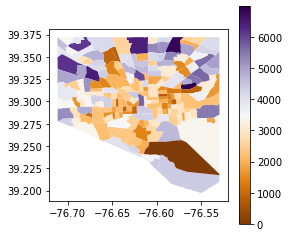

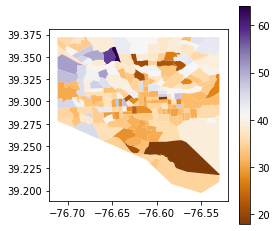

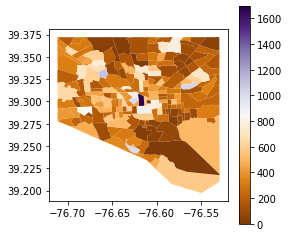

In [245]:
dfYear['Date']
Temp = dfYear[(dfYear['Date'] == 2018)]
Temp = Temp.set_index('Census_Tracts')
baltimore["total_population"] = pd.to_numeric(baltimore["total_population"])
baltimore["median_age"] = pd.to_numeric(baltimore["median_age"])
baltimore["no vehicle available"] = pd.to_numeric(baltimore["no vehicle available"])

baltimore['2018 volume'] = Temp['Count']
baltimore.plot(cmap = 'PuOr',figsize=[4,4], legend=True, column='2018 volume', vmax=25000)
baltimore2.plot(cmap = 'PuOr',figsize=[4,4], legend=True, column='pop_sq_mil', vmax=30000)
baltimore.plot(cmap = 'PuOr',figsize=[4,4], legend=True, column='total_population')
baltimore.plot(cmap = 'PuOr',figsize=[4,4], legend=True, column='median_age', vmin=18)
baltimore.plot(cmap = 'PuOr',figsize=[4,4], legend=True, column='no vehicle available')

In [247]:
baltimore = baltimore[baltimore['median_age']>0]
baltimore['median_age'].unique()

array([45.1, 31.8, 35.9, 33.4, 45.4, 32.6, 30.8, 21.4, 31.9, 34.8, 17.8,
       32.4, 43.5, 28.1, 34.6, 34.3, 47.1, 30.6, 48.3, 28.2, 39.6, 39.2,
       33.8, 38.2, 37.3, 57.9, 40.2, 31.3, 41.8, 32. , 46.1, 46.6, 33.1,
       31. , 46. , 47.7, 31.4, 39.9, 41. , 41.6, 30. , 33.9, 29.9, 35.5,
       37. , 41.2, 22. , 34. , 35. , 36.5, 32.9, 44.6, 46.7, 41.1, 33.6,
       41.9, 45.5, 39.4, 31.1, 28.5, 36.4, 35.3, 33.3, 37.5, 51.2, 48.5,
       28.3, 23.9, 27.6, 36.8, 28.7, 21.5, 31.2, 27.4, 36.3, 40.3, 40.5,
       27.5, 32.2, 35.8, 43.6, 31.6, 29.8, 33. , 38.9, 41.5, 22.1, 43. ,
       37.4, 39. , 43.4, 51.1, 30.5, 39.8, 41.3, 37.9, 44.2, 37.2, 38.8,
       34.9, 39.7, 34.7, 27.9, 38.1, 34.4, 29.1, 43.2, 29.7, 29.4, 38.5,
       26.7, 40.6, 64. , 30.3, 22.3, 37.8, 38.7, 20.7, 42.8, 36.1, 38.6,
       50.6, 30.1, 42.3, 42.2, 40. , 35.1, 35.2, 47.9, 36.6, 44. ])

In [249]:
df.CouncilDistrict.unique()

array([12., 14.,  1.,  3., 10., 11.,  4., 13.,  7.,  5.,  6.,  2.,  9.,
        8.])

In [278]:
ctracts = df.Census_Tracts.unique()
dist = []
for ct in ctracts:
    for idx in df.index:
        if df.Census_Tracts[idx]==ct:
            dist.append(df.CouncilDistrict[idx])
            break

In [279]:
d = {'district': dist, 'census_tracts': df.Census_Tracts.unique()}
district_tract = pd.DataFrame(data=d)
def cen_tract2(tract_string):
    tract = float(tract_string.split()[2])
#     tract = tract/100
    return str(tract).rstrip('0').rstrip('.')

district_tract['census_tracts'] = district_tract.apply(lambda x: cen_tract2(x['census_tracts']),axis=1)

In [276]:
district_tract.sort_values(by=['district'])
district_tract.to_csv('Tract_district.csv',index=False)

In [292]:
ctracts = df.Census_Tracts.unique()
Police_dist = []
for ct in ctracts:
    for idx in df.index:
        if df.Census_Tracts[idx]==ct:
            Police_dist.append(df.PoliceDistrict[idx])
            break

In [297]:
Police_dist
d = {'Police_district': Police_dist, 'census_tracts': df.Census_Tracts.unique()}
PD_tract = pd.DataFrame(data=d)
# # def cen_tract2(tract_string):
# #     tract = float(tract_string.split()[2])
# # #     tract = tract/100
# #     return str(tract).rstrip('0').rstrip('.')

PD_tract['census_tracts'] = PD_tract.apply(lambda x: cen_tract2(x['census_tracts']),axis=1)
PD_tract.sort_values(by=['Police_district'])
PD_tract.to_csv('Tract_PD.csv',index=False)

,Police_district,census_tracts
0,Eastern,1002.00
1,Northern,905.00
2,Southeastern,2608.00
3,Northeastern,2704.02
4,Eastern,1001.00
...,...,...
195,Southwestern,2804.02
196,Southwestern,2501.02
197,Southwestern,2804.01
198,Northern,1308.03


In [290]:
df.PoliceDistrict.unique()

array(['Eastern', 'Northern', 'Southeastern', 'Northeastern', 'Southern',
       'Central', 'Western', 'Northwestern', 'Southwestern', nan],
      dtype=object)

In [333]:
url = "https://github.com/trisha-sen/Streamlit_test/raw/master/tl_2019_24_tract.zip"
url_geojson = "https://github.com/trisha-sen/Streamlit_test/raw/master/baltimore.geojson"
# from io import StringIO
from urllib.request import urlopen
import geojson
with urlopen(url_geojson) as response:
    baltimore_map = geojson.load(response)

url_dataframe = "https://github.com/trisha-sen/Streamlit_test/raw/master/Baltimore_city_details.csv"
dBalt = pd.read_csv(url_dataframe)
dBalt

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Police_district_x,district
0,24,510,261100,24510261100,2611.00,2611.00,G5020,S,219781,0,39.282957,-76.570055,Southeastern,1.0
1,24,510,260605,24510260605,2606.05,2606.05,G5020,S,10012122,7154314,39.258378,-76.549665,Southeastern,1.0
2,24,510,60100,24510060100,601.00,601.00,G5020,S,238719,0,39.294653,-76.575151,Southeastern,1.0
3,24,510,10200,24510010200,102.00,102.00,G5020,S,355165,0,39.288085,-76.574010,Southeastern,1.0
4,24,510,261000,24510261000,2610.00,2610.00,G5020,S,310026,0,39.293583,-76.570876,Southeastern,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,24,510,160500,24510160500,1605.00,1605.00,G5020,S,1036560,0,39.299380,-76.655583,Western,9.0
196,24,510,180200,24510180200,1802.00,1802.00,G5020,S,234701,0,39.291466,-76.636139,Western,9.0
197,24,510,200100,24510200100,2001.00,2001.00,G5020,S,264900,0,39.290966,-76.647819,Western,9.0
198,24,510,190300,24510190300,1903.00,1903.00,G5020,S,375717,0,39.283973,-76.644425,Southern,9.0


In [347]:
PD_tract

,Police_district,census_tracts
0,Eastern,1002
1,Northern,905
2,Southeastern,2608
3,Northeastern,2704.02
4,Eastern,1001
...,...,...
195,Southwestern,2804.02
196,Southwestern,2501.02
197,Southwestern,2804.01
198,Northern,1308.03


In [420]:
# df['Census_Tracts'] = df.apply(lambda x: cen_tract(x['Census_Tracts']),axis=1)
# df[df['Priority']=='High'].Description
# df.Priority.unique()
PD_tract["census_tracts"] = pd.to_numeric(PD_tract["census_tracts"])

dfPrior = df #[df['Priority']=='High']
dfPrior.dropna(subset=['PoliceDistrict'])
dfWeek = pd.DataFrame()
for cd in df.Census_Tracts.unique():    
    PD = PD_tract[PD_tract['census_tracts']==cd].Police_district
    policeD = (PD.tolist()[0])
    dfWeekTemp = pd.DataFrame()
    for priority in ['High','Medium','Low']:
        Temp = df[(df['Census_Tracts']==cd) & (df['Priority']==priority)]
        dfSum = Temp.groupby(pd.Grouper(key='CallDateTime', freq='W'))['Count'].sum()
        dfTemp = pd.DataFrame(dfSum) 
        dfTemp['Date'] = dfSum.index
        dfTemp['Priority'] = priority
        dfWeekTemp = dfWeekTemp.append(dfTemp) 
    dfWeekTemp['Census_Tracts'] = cd
    dfWeekTemp['PoliceDistrict'] = policeD
    dfWeek = dfWeek.append(dfWeekTemp)
dfWeek
# PD

,Count,Date,Priority,Census_Tracts,PoliceDistrict
CallDateTime,,,,,
2013-07-07,14,2013-07-07,High,1002.0,Eastern
2013-07-14,9,2013-07-14,High,1002.0,Eastern
2013-07-21,10,2013-07-21,High,1002.0,Eastern
2013-07-28,13,2013-07-28,High,1002.0,Eastern
2013-08-04,10,2013-08-04,High,1002.0,Eastern
...,...,...,...,...,...
2018-12-09,9,2018-12-09,Low,2506.0,Southern
2018-12-16,9,2018-12-16,Low,2506.0,Southern
2018-12-23,3,2018-12-23,Low,2506.0,Southern


In [421]:
dfWeek.to_csv('Weekly_Data.csv')

In [437]:
dfYear = pd.DataFrame()
dfTemp = pd.DataFrame()
for priority in ['High','Medium','Low']:
    Temp = dfWeek[dfWeek['Priority']== priority]
    dfSum = Temp.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index
    dfTemp['Priority'] = priority
    dfYear = dfYear.append(dfTemp)
dfYear

,Count,Date,Priority
Date,,,
2013-07-07,2187,2013-07-07,High
2013-07-14,1944,2013-07-14,High
2013-07-21,1938,2013-07-21,High
2013-07-28,1986,2013-07-28,High
2013-08-04,1952,2013-08-04,High
...,...,...,...
2018-12-09,3823,2018-12-09,Low
2018-12-16,3941,2018-12-16,Low
2018-12-23,3938,2018-12-23,Low


(0, 16442.8)

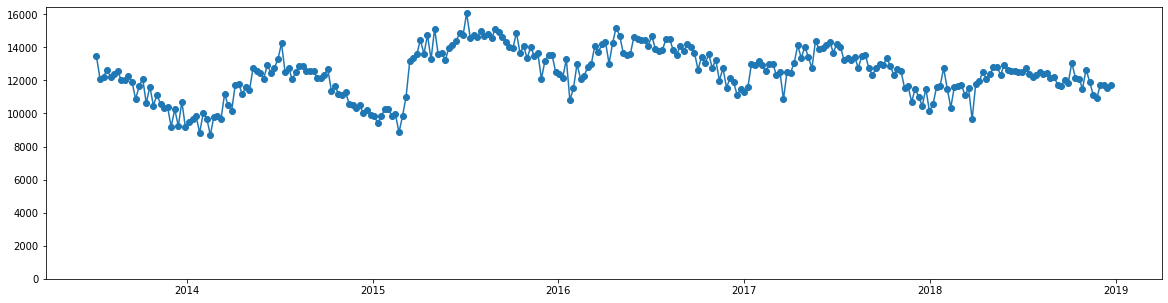

In [481]:
df1= dfYear[(dfYear['Priority']=='High') | (dfYear['Priority']=='Medium')            
           ]#| (dfYear['Priority']=='Low')]
df1= pd.DataFrame(df1.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()) #
df1['Date'] = df1.index
df1 = df1[1:]
df1 = df1[0:-2]
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(df1.Date, df1.Count, linestyle = '-', marker = 'o')
ax.set_ylim(0,)

In [486]:
df[df['Priority']=='Medium'].Description.unique()

array(['DISORDERLY', 'BURGLARY', 'FAMILY DISTURB', ..., '*COMBATIVE PATI',
       '*SCREAM 4 HELP', '*3Q'], dtype=object)

In [495]:
dfWeekFin = pd.DataFrame()
for cd in df.Census_Tracts.unique():    
    PD = PD_tract[PD_tract['census_tracts']==cd].Police_district
    policeD = (PD.tolist()[0])
    
    Temp = dfWeek[(dfWeek['Census_Tracts']==cd) & (dfWeek['Priority']!='Low')]
    dfSum = Temp.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()
    dfTemp = pd.DataFrame(dfSum) 
    dfTemp['Date'] = dfSum.index
    dfTemp['Census_Tracts'] = cd
    dfTemp['PoliceDistrict'] = policeD
    
    dfWeekFin = dfWeekFin.append(dfTemp)
dfWeekFin.to_csv('MedHighWeeklyCount.csv')
# PD

(0, 1804.3)

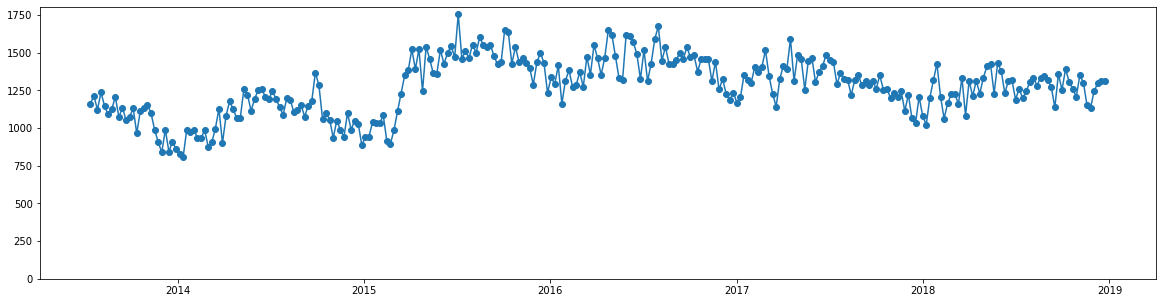

In [497]:
def District_counts(police_district): 
    
    Temp = dfWeekFin[(dfWeekFin['PoliceDistrict']==police_district)]
    dfSum = Temp.groupby(pd.Grouper(key='Date', freq='W'))['Count'].sum()
    dfWeekDistrict = pd.DataFrame(dfSum) 
    dfWeekDistrict['Date'] = dfSum.index
    dfWeekDistrict['PoliceDistrict'] = police_district
    dfWeekDistrict = dfWeekDistrict[1:]
    dfWeekDistrict = dfWeekDistrict[0:-2]
    return(dfWeekDistrict)

police_district = 'Eastern'
dfWeekDistrict = District_counts(police_district)
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot_date(dfWeekDistrict.Date, dfWeekDistrict.Count, linestyle = '-', marker = 'o')
ax.set_ylim(0,)

PoliceDistrict
Central         100401
Eastern          65748
Northeastern     77254
Northern         58269
Northwestern     60458
Southeastern     65429
Southern         69704
Southwestern     70625
Western          53404
Name: Count, dtype: int64

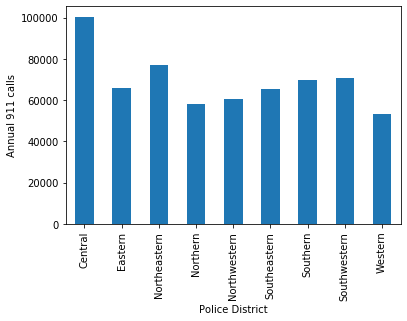

In [524]:
import statistics as stat
dfWeekFin['Date'] = pd.to_datetime(dfWeekFin['Date'])
dfTemp = dfWeekFin[dfWeekFin['Date'].dt.year==2018]
c = dfTemp.groupby(['PoliceDistrict'])['Count'].sum()
ax = c.plot.bar()
ax.set_xlabel('Police District')
ax.set_ylabel('Annual 911 calls')

In [580]:
s = np.arange(len(dfWeekFin))
dfNew = dfWeekFin.set_index(s)
ND_tract = pd.read_csv('Tract_ND.csv')

dfTemp = pd.DataFrame()
ND = []
for idx in dfNew.index:
    ct = dfNew.Census_Tracts[idx]
    ND.append(ND_tract[ND_tract['census_tracts']==ct].New_district.values[0])
    
dfNew['New_district']=ND

Text(0, 0.5, 'Annual 911 calls')

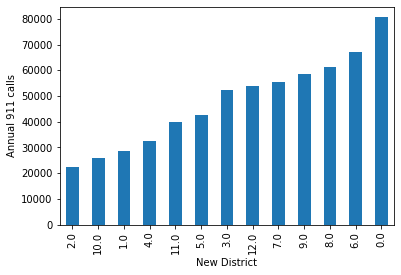

In [581]:
dfNew['Date'] = pd.to_datetime(dfNew['Date'])
dfTemp = dfNew[dfNew['Date'].dt.year==2018]
c = dfTemp.groupby(['New_district'])['Count'].sum().sort_values()
ax = c.plot.bar()
ax.set_xlabel('New District')
ax.set_ylabel('Annual 911 calls')

In [582]:
dfTemp.to_csv('count2018.csv')

In [639]:
var_years = ['2013','2014','2015','2016','2017','2018']
vars = "S0101_C01_001E"
labels = ['total_population']
dfDem = pd.DataFrame()

for i in range(0,len(var_years)):    
    api_url_base = 'https://api.census.gov/data/' + var_years[i] + '/acs/acs5/subject/'
    parameter = {"get":"S0101_C01_001E",
    #              DP04_0001E,DP04_0002E,DP04_0003E,DP04_0016E,DP04_0027E,DP04_0037E,DP04_0050E,DP04_0057E,DP04_0080E,DP04_0090E,DP04_0093E",
                 "key":api_token,"for":'tract:*',"in":'state:24 county:510'}
    request = requests.get(api_url_base,parameter)
    #print(request.text)
    rhyme_json = request.json()
    writeFile =open('file_name.json', 'w')
    #writeFile.write(rhyme_json)
    with open('file_name.json', 'w', encoding='utf-8') as f:
        json.dump(rhyme_json, f, ensure_ascii=False, indent=4)
    writeFile.close()

    dfTemp = pd.read_json('file_name.json') #_, orient='split'
    dfTemp.iloc[0]
    dfTemp.columns = dfTemp.iloc[0]
    dfTemp = dfTemp.drop([0])
    dfTemp = dfTemp.drop(columns = ['state','county'])
    dfTemp.columns =  [var_years[i],'tract']

    if len(dfDem)==0:
        print(1)
        dfDem = dfTemp
    else:
        dfDem = dfDem.join(dfTemp.set_index('tract'), on='tract')

    # dfDem.join(other.set_index('key'), on='key')

dfDem['tract'] = dfDem['tract'].astype(str).astype(float)/100
dfDem.to_csv('Population.csv')
dfDem

1


,2013,tract,2014,2015,2016,2017,2018
1,3184,101.00,3091,3039,3176,3201,3022
2,3890,102.00,3334,3292,3332,3145,2869
3,2359,103.00,2390,2554,2479,2552,2571
4,2184,104.00,2264,2375,2527,2573,2478
5,1939,105.00,2018,1695,1743,1712,1976
...,...,...,...,...,...,...,...
196,3363,2804.01,3641,3666,3693,3606,3479
197,1830,2804.02,1850,1912,1762,1657,1634
198,5293,2804.03,5164,5357,6001,5431,5264
199,2156,2804.04,2368,2370,2386,2519,2812


In [672]:
ND_tract = pd.read_csv('Tract_ND.csv')
ND = []
for idx in dfDem.index:
    ct = dfDem.tract[idx]
    ND.append(ND_tract[ND_tract['census_tracts']==ct].New_district.values[0])
    
dfDem['New_district']=ND
dfDem

#summing over districts
NDs = dfDem['New_district'].unique()
dfPop = pd.DataFrame()
for nd in NDs:
    Temp = dfDem[dfDem['New_district']==nd].drop(columns = ['tract','New_district'])
    dfSum = Temp.astype(float).sum()
    dfSum = pd.DataFrame(dfSum).T
    dfSum['New_district'] = nd
    dfPop = dfPop.append(dfSum)   
    
dfPop = dfPop.reset_index(drop=True)
dfPop

,2013,2014,2015,2016,2017,2018,New_district
0,57671.0,57143.0,57278.0,58233.0,58888.0,56786.0,0.0
1,54607.0,54144.0,52906.0,52409.0,51088.0,49667.0,7.0
2,63121.0,63080.0,62488.0,60410.0,59281.0,59863.0,5.0
3,57847.0,58010.0,57177.0,56769.0,59038.0,58536.0,4.0
4,66305.0,66297.0,66619.0,66119.0,66381.0,66585.0,2.0
5,65647.0,65783.0,67051.0,67011.0,66019.0,65523.0,6.0
6,108274.0,109719.0,110742.0,111196.0,111034.0,110453.0,3.0
7,40990.0,41378.0,40663.0,40802.0,38600.0,38058.0,8.0
8,106983.0,106717.0,107530.0,108051.0,109467.0,109229.0,1.0


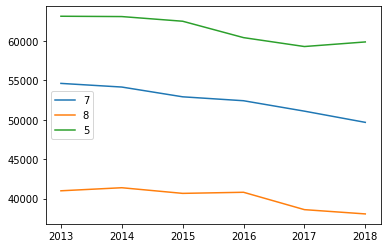

In [687]:
a = np.arange(2013,2019)
nds = [7,8,5] #dfPop.New_district.unique()
for ND in nds:
    y = dfPop[dfPop['New_district']==ND].drop(columns=['New_district'])
    plt.plot(a,y.T)

plt.legend(nds)
plt.show()
    